Singular values:
 [4.12118836 3.70619337 3.39170134 3.18371851 2.76916034 1.66613954
 0.44268012]


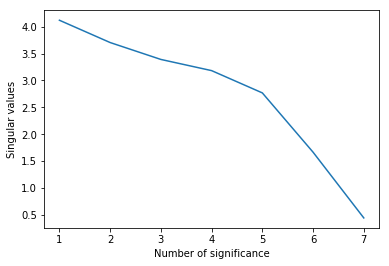

[3, 7]
[-0.08026895  0.05510155 -0.08312082]
v [ 0.18948864 -0.65535699  0.31362779 -0.17784304  0.01487295 -0.28257598
 -0.56968442]
v [-0.61751429 -0.10996545  0.09899626  0.38887114  0.01997383 -0.64406389
  0.1741994 ]
v [ 0.27028523  0.1634905  -0.45474155  0.6127645  -0.26020366 -0.12598817
 -0.48411526]
0.616080944194551
('Forest', 'Algorithms')
 relavant doc1:d7 rank=0.7465154969093657
 relavant doc2:d2 rank=0.25743522554810433
[4, 5]
[ 0.01816368  0.08445255 -0.18319781]
v [ 0.18948864 -0.65535699  0.31362779 -0.17784304  0.01487295 -0.28257598
 -0.56968442]
v [-0.61751429 -0.10996545  0.09899626  0.38887114  0.01997383 -0.64406389
  0.1741994 ]
v [ 0.27028523  0.1634905  -0.45474155  0.6127645  -0.26020366 -0.12598817
 -0.48411526]
-0.1402850734358691
('Program', 'search')
 relavant doc1:d3 rank=0.48071209104787377
 relavant doc2:d7 rank=0.4594232199980464
[0, 3]
[ 0.13767922 -0.03526091 -0.04276509]
v [ 0.18948864 -0.65535699  0.31362779 -0.17784304  0.01487295 -0.28257598
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools, random
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

def LSI(T,k):
    '''
        input: term-doc matrix, truncation:k, query vector: q
        output: ranking of documents for the query
    '''
    U, Sigma, VT = LA.svd(T, full_matrices=True)
    print("Singular values:\n",Sigma)
    #plot the singular values
    plt.plot(np.arange(1,len(Sigma)+1), Sigma)
    plt.xlabel("Number of significance")
    plt.ylabel("Singular values")
    plt.show()
    
    U_k=U[:,:k]
    
    V_k_T=VT[:k,:]
    S_k=np.diag(Sigma[:k])
    
    S_k_inv=np.linalg.inv(S_k)
    return(S_k_inv, U_k.T, V_k_T)
    
    
    
    
def convert_to_queryvector(q,terms):
    query_vector= np.zeros(len(terms))
    pos = [ terms.index(i) for i in q ]
    print(pos)
    for p in pos:
        query_vector[p]=1
    return(query_vector)

    
terms=['Graphs','Trees', 'Flowers', 'Forest', 'Program', 'search', 'bark', 'Algorithms', 'Paths' ]
docs=['d1','d2','d3','d4','d5','d6','d7']

#term-doc matrix
T=pd.DataFrame(index=terms, columns=docs)
T['d1']=np.array([1,1,0,0,1,0,0,0,1])
T['d2']=np.array([0,1,0,0,0,1,0,1,1])
T['d3']=np.array([1,0,0,1,1,1,0,0,0])
T['d4']=np.array([0,1,1,1,0,1,0,0,1])
T['d5']=np.array([0,1,0,0,1,1,1,0,0])
T['d6']=np.array([1,1,0,0,0,0,0,1,0])
T['d7']=np.array([0,0,0,0,0,1,0,1,0])
T = StandardScaler().fit_transform(T)
#center T
T=T-T.mean()

#SVD
Sk_inv, UkT, VkT=LSI(T,3)

term_comb = list(itertools.combinations(terms,2))
random.seed(0)
queries=random.sample(term_comb, 10)
l=[]
for q in queries:

    q_vector=convert_to_queryvector(q,terms)
    qk=np.dot(Sk_inv,np.dot(UkT,q_vector))
    print(qk)
    similarity=(qk.T).dot(VkT)
    for i in range(VkT.shape[0]):
        similarity_norm=similarity/(LA.norm(qk,ord=2)*LA.norm(VkT[i],ord=2))
    
    ranking=np.argsort(-similarity_norm)
    doc1=docs[ranking[0]]
    rank1=list(similarity_norm)[ranking[0]]
    doc2=docs[ranking[1]]
    rank2=list(similarity_norm)[ranking[1]]
    print(q)
    print(" relavant doc1:" +doc1+" rank="+str(rank1))
    print(" relavant doc2:" +doc2+" rank="+str(rank2))
    l.append([q, doc1,rank1, doc2, rank2])
print(l)
f=pd.DataFrame(l, columns=['q','d1','r1','d2','r2'])
f.to_csv("rank.csv")



In [ ]:
-1.28423474e-01+4.10800937e-01



0.282377463